# 다항 회귀

## 선형 기저 함수 모형(Linear Basis Function Models) => ϕ(x)

일반적인 선형 회귀 모형은 다음과 같은 수식을 만족한다.

$$ y_i = \sum_{i=1}^{D} w_i x_i = w^T x $$

이 때 가중치 벡터 $w$의 차원은 독립 변수의 차원과 같다. 즉 $x \in \mathbf{R}^D$  이면 $w \in \mathbf{R}^D$  이다.


선형 기저 함수 모형(Linear Basis Function Models)은 x를 직접 선형 조합(linear combination)하지 않고 기저 함수를 통해 변환한 값을 새로운 독립 변수로 가정하고 선형 회귀 모형을 적용한 것과 같다. 따라서 기저 함수에 따라 가중치 벡터의 차원이 달라질 수 있다. 즉, $ \phi(\cdot): \mathbf{R}^D \rightarrow \mathbf{R}^M $ 이면  $w \in \mathbf{R}^M$  이다.

$$ y_i = \sum_{j=1}^{M} w_j \phi_j(x)  = w^T \phi(x)  $$

## 다항 회귀

언제 쓰느냐? 밑에 1차항으로 할 때에는 잘 안 맞지만 2, 3, 4 차항으로 늘릴수록 잘 맞게 된다.

다항 회귀는 다음과 같은 다항식 함수를 기저 함수로 사용하는 선형 기저 함수 모형의 일종이다.

$$ 1, x, x^2, \ldots, x^M $$

따라서 종속 변수와 독립 변수의 관계는 다음과 같이 표현할 수 있다.

$$ y = w_0 + w_1x + w_2x^2  + \ldots  + w_M x^M $$


## statsmodels를 이용한 다항 회귀

* 여기는 방법이 없다. 일일이 다 넣어줘야 한다.
* 여기서는 I(x**2) -> I를 넣는 것이 중요하다.

statsmodels에서는 `OLS` 클래스의 `from_formula` 메서드를 사용하여 다항 회귀를 할 수 있다.

In [2]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4)", data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     25.20
Date:                Fri, 09 Sep 2016   Prob (F-statistic):           2.63e-05
Time:                        08:17:22   Log-Likelihood:                -20.253
No. Observations:                  30   AIC:                             44.51
Df Residuals:                      28   BIC:                             47.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5367      0.207      2.595      0.0

## Scikit-Learn을 이용한 다항 회귀

Scikit-Learn에서는 preprocessing 서브 패키지의 `PolynomialFeatures` 클래스를 사용하여 다항 회귀를 할 수 있다.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [5]:
def polyreg(degree, seed=0, plot=True):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
    
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    
    model.fit(X, y)
    
    if plot:
        plt.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        plt.plot(xx, model.predict(xx[:, np.newaxis]))
        plt.ylim(-2, 2)
        plt.show()
        
    reg = model.named_steps["linear_regression"]
    return reg.coef_, reg.intercept_

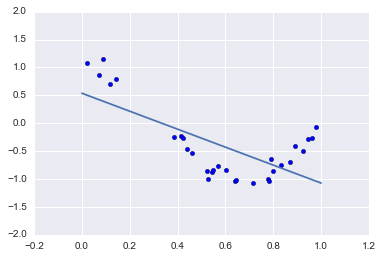

(array([ 0.        , -1.60931179]), 0.53668033031787343)

In [6]:
polyreg(1)

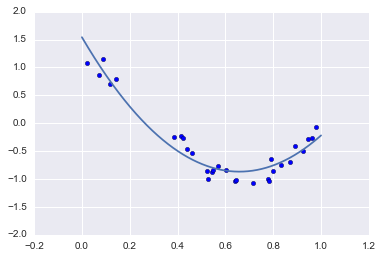

(array([ 0.        , -7.31956683,  5.55955392]), 1.5411486872392575)

In [7]:
polyreg(2)

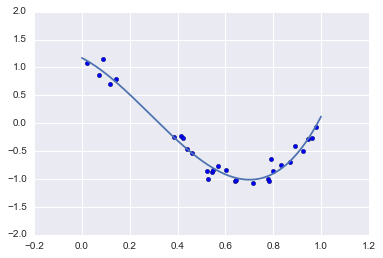

(array([ 0.        , -2.19617614, -7.05669992,  8.202858  ]),
 1.1693941158316361)

In [8]:
polyreg(3)

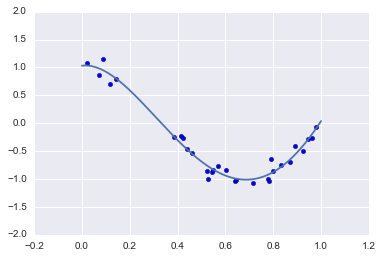

(array([  0.        ,   0.46754142, -17.78954475,  23.5926603 ,  -7.26289872]),
 1.0310751547291332)

In [9]:
polyreg(4)

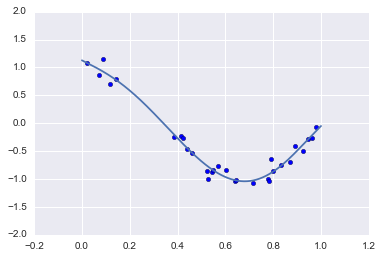

(array([  0.        ,  -2.17893409,   0.83127959, -26.17982339,
         48.6673596 , -22.31700272]), 1.1268720279438111)

In [10]:
polyreg(5)

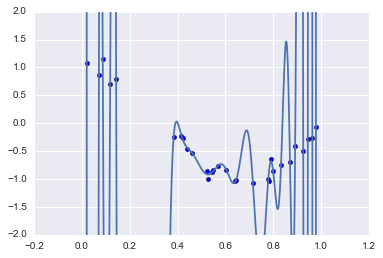

(array([ -2.58582644e+11,  -6.80720245e+05,   2.78921494e+07,
         -6.08622191e+08,   8.11570897e+09,  -7.08900070e+10,
          4.20811045e+11,  -1.72180938e+12,   4.80612381e+12,
         -8.68110969e+12,   8.45824899e+12,  -3.61491175e+11,
         -7.52330248e+12,   2.38770144e+12,   6.90034833e+12,
         -7.97062080e+11,  -7.02588377e+12,  -2.62691433e+12,
          5.07826042e+12,   6.01517432e+12,   3.28272913e+11,
         -5.46621357e+12,  -5.83770055e+12,  -7.50575759e+11,
          4.83951274e+12,   6.44684135e+12,   2.70694845e+12,
         -2.72780692e+12,  -6.49283409e+12,  -5.36477897e+12,
         -6.63402216e+11,   4.19414794e+12,   6.46437619e+12,
          4.90141568e+12,   2.09901253e+11,  -4.49845493e+12,
         -6.91247176e+12,  -4.95424628e+12,  -1.31361857e+11,
          5.00743210e+12,   7.20233596e+12,   4.91312478e+12,
         -6.73833518e+11,  -6.28204408e+12,  -7.59411337e+12,
         -3.03134127e+12,   5.15691122e+12,   9.26561711e+12,
        

In [13]:
polyreg(50)

## 과최적화

모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 과최적화(overfitting)이라고 한다.

과최적화는 
* 독립 변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나 
* 독립 변수 데이터가 서로 독립이 아닌 경우에 발생한다.

이러한 상황에서는 같은 조건에 대해 답이 복수개 존재할 수 있기 때문이다. 

과최적화가 문제가 되는 이유는 다음과 같다.

* 샘플이 조금만 변화해도 fitting 결과가 크게 달라지며
* 트레이닝에 사용되지 않은 새로운 독립 변수 값을 입력하면 오차가 커진다. (cross-validation 오차)



나쁜 이유? 회귀 결과의 안전성을 해치게 된다.

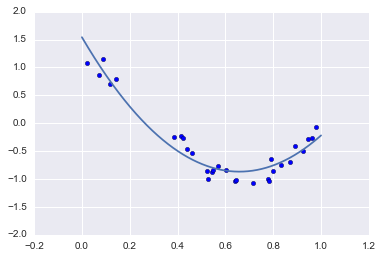

(array([ 0.        , -7.31956683,  5.55955392]), 1.5411486872392575)

In [14]:
polyreg(2, 0)

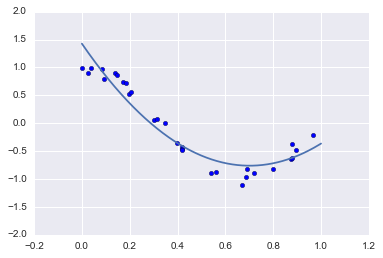

(array([ 0.        , -6.23625845,  4.44609448]), 1.4254320912432312)

In [15]:
polyreg(2, 1)

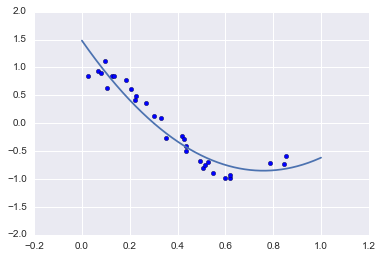

(array([ 0.        , -6.13954485,  4.0416645 ]), 1.4805367495708419)

In [16]:
polyreg(2, 2)

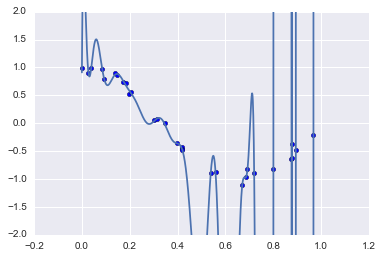

(array([ -5.47448020e+11,   6.44157110e+02,  -7.40730348e+04,
          3.48350193e+06,  -8.96656193e+07,   1.43698357e+09,
         -1.53918469e+10,   1.14736513e+11,  -6.07280084e+11,
          2.28731331e+12,  -6.01097714e+12,   1.03730379e+13,
         -9.72619042e+12,   3.66798592e+11,   8.02062226e+12,
         -2.07433329e+12,  -7.06961353e+12,   3.87526331e+10,
          6.39914962e+12,   3.50905490e+12,  -3.22815357e+12,
         -5.68253300e+12,  -2.30698187e+12,   2.76778178e+12,
          5.11608821e+12,   3.19428522e+12,  -7.70560150e+11,
         -4.02808551e+12,  -4.16196853e+12,  -2.05951902e+12,
          1.19476534e+12,   3.40865326e+12,   3.79186390e+12,
          2.28658519e+12,  -1.89277394e+11,  -2.52062564e+12,
         -3.42754610e+12,  -2.84385807e+12,  -1.09345380e+12,
          9.83257114e+11,   2.73907097e+12,   3.16779518e+12,
          2.10316933e+12,   1.61098975e+11,  -1.94417319e+12,
         -2.98160977e+12,  -2.39776327e+12,  -1.80860404e+11,
        

In [17]:
polyreg(50, 1)

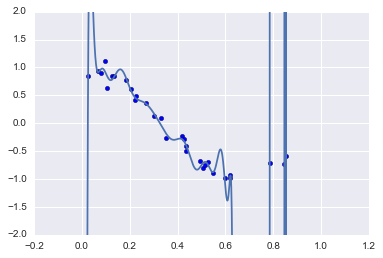

(array([ -7.36367919e+11,   1.98862853e+04,  -9.43255589e+05,
          2.52486547e+07,  -4.31435440e+08,   5.02001909e+09,
         -4.12519297e+10,   2.43931445e+11,  -1.04191011e+12,
          3.17099610e+12,  -6.58645047e+12,   8.29151119e+12,
         -3.66418428e+12,  -4.74664867e+12,   4.94736103e+12,
          3.93631313e+12,  -3.73835146e+12,  -5.00802180e+12,
          5.91002006e+11,   4.98316155e+12,   3.64841210e+12,
         -1.10050540e+12,  -4.51331075e+12,  -4.12040992e+12,
         -8.19796594e+11,   2.77530003e+12,   4.48184705e+12,
          3.66140487e+12,   1.09451822e+12,  -1.80099548e+12,
         -3.77157666e+12,  -4.18495248e+12,  -3.10565095e+12,
         -1.07949366e+12,   1.15979340e+12,   2.95821020e+12,
          3.90011136e+12,   3.85361281e+12,   2.93666534e+12,
          1.43053265e+12,  -3.10665077e+11,  -1.94308846e+12,
         -3.18783429e+12,  -3.85953144e+12,  -3.87210911e+12,
         -3.22858099e+12,  -2.00098843e+12,  -3.06821345e+11,
        

In [18]:
polyreg(50, 2)

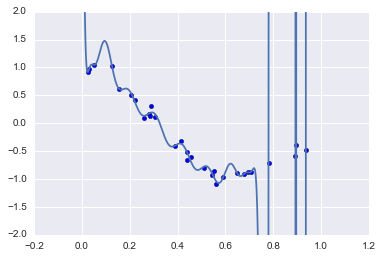

(array([ -3.87805842e+10,  -1.77317214e+03,   1.12030454e+05,
         -3.86896320e+06,   8.21826811e+07,  -1.14496831e+09,
          1.08950125e+10,  -7.25627709e+10,   3.41571895e+11,
         -1.12761343e+12,   2.51778326e+12,  -3.42043709e+12,
          1.78238479e+12,   1.83288713e+12,  -2.40845939e+12,
         -1.40529671e+12,   2.02815892e+12,   1.97622491e+12,
         -9.15956983e+11,  -2.37304875e+12,  -9.88543506e+11,
          1.34825772e+12,   2.19567815e+12,   1.03941044e+12,
         -8.83231980e+11,  -1.98986655e+12,  -1.62116095e+12,
         -2.28608407e+11,   1.20932889e+12,   1.85989068e+12,
          1.46358392e+12,   3.45547743e+11,  -8.61535581e+11,
         -1.62237881e+12,  -1.61366285e+12,  -9.32555113e+11,
          1.04081342e+11,   1.04728973e+12,   1.55242621e+12,
          1.46919580e+12,   8.36036798e+11,  -9.34323271e+10,
         -9.82578751e+11,  -1.50849588e+12,  -1.45971222e+12,
         -8.08456774e+11,   2.52038896e+11,   1.32101268e+12,
        

In [19]:
polyreg(50, 3)